Uses:

http://linanqiu.github.io/2015/10/07/word2vec-sentiment/

https://umap-learn.readthedocs.io/en/latest/clustering.html

### Train Doc2Vec

In [1]:
# gensim modules
from gensim import utils
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec

# numpy
import numpy

# random
from random import shuffle

# classifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# got data by cloning: https://github.com/linanqiu/word2vec-sentiments
#gensim Doc2Vec only takes in Labeled Line Sentence classes 

In [2]:
#class to take a dictionary of files, read, format, label 
#classes are objects of functions that share variables

class LabeledLineSentence(object):
    #initialize class. self refers to the class
    def __init__(self, sources):
        #sources will be a shared parameter for class
        self.sources = sources
        
        flipped = {}
        
        # make sure that keys are unique (sources is a dict)
        #flip key:value to value:key to ensure every key has unique value
        #raise exception if have multiple keys for 1 value
        for key, value in sources.items():
            if value not in flipped:
                flipped[value] = [key]
            else:
                raise Exception('Non-unique prefix encountered')
    
    #if want data as iterator 
    #iterate through sources
    #for each source, open file
    #return unicode list of words in line split by space and prefix+item# as TaggedDocument
    def __iter__(self):
        for source, prefix in self.sources.items():
            with utils.smart_open(source) as fin:
                for item_no, line in enumerate(fin):
                    yield TaggedDocument(utils.to_unicode(line).split(), [prefix + '_%s' % item_no])
    
    #if want data as an array
    def to_array(self):
        self.sentences = []
        for source, prefix in self.sources.items():
            with utils.smart_open(source) as fin:
                for item_no, line in enumerate(fin):
                    self.sentences.append(TaggedDocument(utils.to_unicode(line).split(), [prefix + '_%s' % item_no]))
        return self.sentences
    
    #shuffle document order 
    def sentences_perm(self):
        shuffled = list(self.sentences)
        shuffle(shuffled)
        return shuffled

In [3]:
#create dict of data scources 
sources = {'w2vsent (git)/word2vec-sentiments/test-neg.txt':'TEST_NEG', 'w2vsent (git)/word2vec-sentiments/test-pos.txt':'TEST_POS', 'w2vsent (git)/word2vec-sentiments/train-neg.txt':'TRAIN_NEG', 'w2vsent (git)/word2vec-sentiments/train-pos.txt':'TRAIN_POS', 'w2vsent (git)/word2vec-sentiments/train-unsup.txt':'TRAIN_UNS'}

sentences = LabeledLineSentence(sources)

In [18]:
#define doc2vec model
model = Doc2Vec(min_count=1, window=10, vector_size=100, sample=1e-4, negative=5, workers=7)


#use model to build vocab
model.build_vocab(sentences.to_array())

In [21]:
#multiple epochs, but shuffle the order we feed in after each epoch
for epoch in range(10):
    print('Epoch %d' %epoch)
    model.train(sentences.sentences_perm(),total_examples=model.corpus_count,epochs=1)

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9


In [23]:
model.wv.most_similar('good')

[('nice', 0.6974087953567505),
 ('great', 0.6966586709022522),
 ('bad', 0.6601657271385193),
 ('decent', 0.6535385847091675),
 ('terrific', 0.612062931060791),
 ('solid', 0.6077233552932739),
 ('fine', 0.5853490829467773),
 ('excellent', 0.5782768726348877),
 ('alright', 0.559374213218689),
 ('fantastic', 0.5098010301589966)]

In [24]:
model.wv.most_similar('spielberg')

[('steven', 0.5286897420883179),
 ('serpico', 0.5100363492965698),
 ('latt', 0.5079025030136108),
 ('bashers', 0.5069671273231506),
 ('kubrick', 0.5027161836624146),
 ('soderberg', 0.4896114766597748),
 ('craven', 0.4726443886756897),
 ('ruegger', 0.4686766266822815),
 ('gulagher', 0.4619401693344116),
 ('coppola', 0.460299015045166)]

In [28]:
model['TRAIN_POS_0']

array([ 0.17210831,  0.53068894,  0.08875216, -0.22204731,  0.08920082,
       -0.41164   , -0.10716269,  0.01384323, -0.44027948, -0.04258307,
       -0.3661883 ,  0.3593273 , -0.39790803,  0.29294032, -0.5823881 ,
        0.4351405 , -0.33027872,  0.05932414,  0.50758123, -0.08620853,
        0.03721116, -0.0885262 ,  0.47685373,  0.0458203 , -0.1292882 ,
        0.32321823,  0.1800003 , -0.3754428 , -0.10352938,  0.02824782,
        0.50372   ,  0.13023265, -0.11537365,  0.10333041, -0.5935597 ,
        0.10701659,  0.42890313, -0.4348067 , -0.05726193, -0.42349628,
       -0.14245322,  0.15413284,  1.047601  ,  0.13994423,  0.8603275 ,
       -0.30993137,  0.11837404, -0.04155462,  0.18748598, -0.6198913 ,
       -0.1445792 ,  0.00320736, -0.37068844,  0.32822382, -0.17440598,
       -0.24452095,  0.19037859, -0.43866974, -0.8702648 , -0.7223541 ,
        0.21947137,  0.42983302, -0.05602715,  0.17835127,  0.06716342,
       -0.31129426, -0.20862402, -0.5284197 , -0.36720476, -0.31

In [87]:
model.docvecs.most_similar('TRAIN_POS_0')

[('TRAIN_POS_1934', 0.6886619329452515),
 ('TRAIN_POS_4722', 0.6827501058578491),
 ('TEST_POS_6954', 0.6789910793304443),
 ('TRAIN_POS_8849', 0.6780802011489868),
 ('TRAIN_NEG_3214', 0.6722345352172852),
 ('TRAIN_NEG_4430', 0.6705719232559204),
 ('TRAIN_POS_1496', 0.668876051902771),
 ('TEST_POS_7943', 0.6654232740402222),
 ('TRAIN_NEG_7613', 0.6619976162910461),
 ('TRAIN_POS_9979', 0.6605291962623596)]

### UMAP

UMAP as preprocessing useful for density based clustering

In [95]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dimension reduction and clustering libraries
import umap
import hdbscan
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [142]:
sns.set(style='white', rc={'figure.figsize':(10,8)})

In [90]:
#extract document vectors and labels


train_arrays = numpy.zeros((25000, 100))
train_labels = numpy.zeros(25000)

for i in range(12500):
    prefix_train_pos = 'TRAIN_POS_' + str(i)
    prefix_train_neg = 'TRAIN_NEG_' + str(i)
    train_arrays[i] = model[prefix_train_pos]
    train_arrays[12500 + i] = model[prefix_train_neg]
    train_labels[i] = 1
    train_labels[12500 + i] = 0


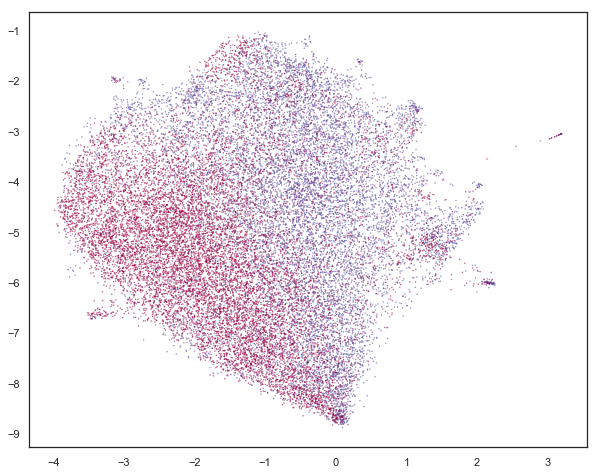

In [93]:
#umap and viz colored by positive/negative "labels"
standard_embedding = umap.UMAP(random_state=42).fit_transform(train_arrays)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=train_labels, s=0.1, cmap='Spectral');


### HDBSCAN

extends DBSCAN by converting into hierarchical clustering algorithm and then extracting a flat clustering based on the stability of clusters.
- Transforms space according to density/sparsity 
- Build minimum spanning tree of the distance weighted graph
- Constructs a cluster hierarchy based on min cluster size
- Extracts the stable clusters from the condensed tree


In [96]:
# reduce dimensions to 50 with PCA
lowd_imdb = PCA(n_components=50).fit_transform(train_arrays)
#run HDBSCAN
hdbscan_labels = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=500).fit_predict(lowd_imdb)


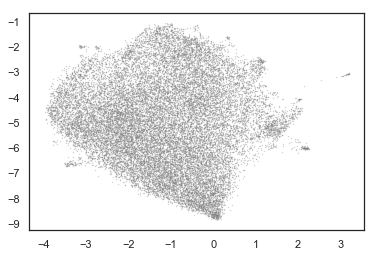

In [97]:
#hdbscan defers clustering points it isn't confident in,
#classifying them as “noise”
#check this by coloring points not clasified gray
clustered = (hdbscan_labels >= 0)
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=hdbscan_labels[clustered],
            s=0.1,
            cmap='Spectral');

In [101]:
#it actually didn't cluster anything
np.sum(clustered) 

#problem with high dimensions in density clustering algoritms.
#high dimensions requires more observed samples to produce density
#However reducing any more with PCA will lose a lot of variance in the data


0

In [137]:
# when using UMAP for dimension reduction instead of visualization,
# want larger n_neighbors value to maintain more global structure
# want low min_dist because want to pack points densely 

clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=3,
    random_state=42,
).fit_transform(train_arrays)


In [157]:
hdb_clusterer=hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=250)

labels = hdb_clusterer.fit_predict(clusterable_embedding)

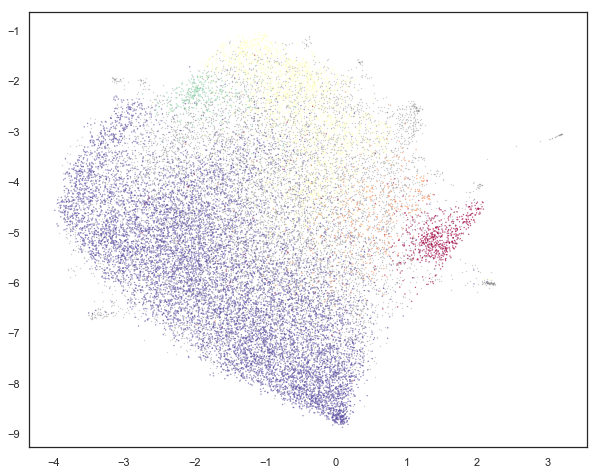

In [158]:
#check how many points clustered

clustered = (labels >= 0)
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral');

In [159]:
np.sum(clustered)/train_arrays.shape[0]

0.54548

In [160]:
#how many clusters?
set(labels)

{-1, 0, 1, 2, 3, 4}

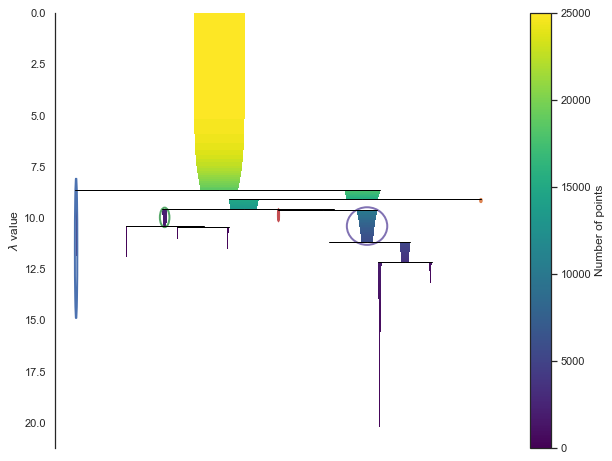

In [161]:
#dendogram

hdb_clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette('deep',8))